In [48]:
import pandas as pd
import numpy as np 

In [49]:
df = pd.read_csv(r"C:\Users\Vikram\Desktop\Minor Project\1. Raw Sets\DATASET FOR LSTM MODEL.csv",index_col=[1])

In [50]:
df.head()

,Unnamed: 0,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
857781,1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,...,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,11,"(69,79]"
743087,2,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"(69,79]"
866418,3,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(59,69]"
775928,4,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,11,"(69,79]"
810128,5,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(69,79]"


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 166 entries, Unnamed: 0 to ageCat
dtypes: float64(119), int64(32), object(15)
memory usage: 2.6+ MB


In [52]:
cat_col=df.select_dtypes(include="object")

num_col=df.select_dtypes(include="number")
num_col.shape, cat_col.shape

((2008, 151), (2008, 15))

In [53]:
df.drop(['DestinationDischarge', 'admission.ward','admission.way','occupation','discharge.department'], axis = 1,inplace=True)
df.drop(['weight','height'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop('cholinesterase',axis=1,inplace=True)
df.drop(['time.of.death..days.from.admission.'],axis=1,inplace=True)
df.drop(df[df['outcome.during.hospitalization'] == 0].index, inplace = True)
df.drop(["death.within.6.months","death.within.28.days","death.within.3.months"],axis=1,inplace=True)
df.drop(["visit.times"],axis=1,inplace=True)
df.drop(["dischargeDay"],axis=1,inplace=True)
df.drop(["re.admission.within.28.days","re.admission.within.3.months","re.admission.within.6.months"],axis=1,inplace=True)
df.drop(["return.to.emergency.department.within.6.months"],axis=1,inplace=True)
df.drop(["outcome.during.hospitalization"],axis=1,inplace=True)
df.drop(['re.admission.time..days.from.admission.'],axis=1,inplace=True)
df.drop(['time.to.emergency.department.within.6.months'],axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 144 entries, gender to ageCat
dtypes: float64(112), int64(23), object(9)
memory usage: 2.3+ MB


In [55]:

cat_col=df.select_dtypes(include="object")

In [56]:

num_col=df.select_dtypes(include="number")

In [57]:
num_col.shape

(2008, 135)

In [58]:
cat_col.shape

(2008, 9)

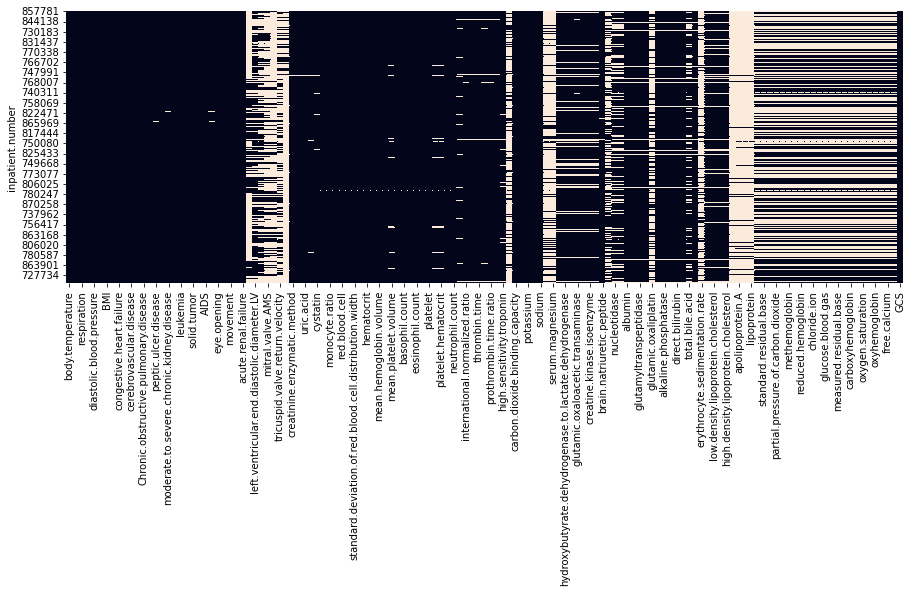

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(num_col.isnull(), cbar = False)

# display the plot
plt.show()

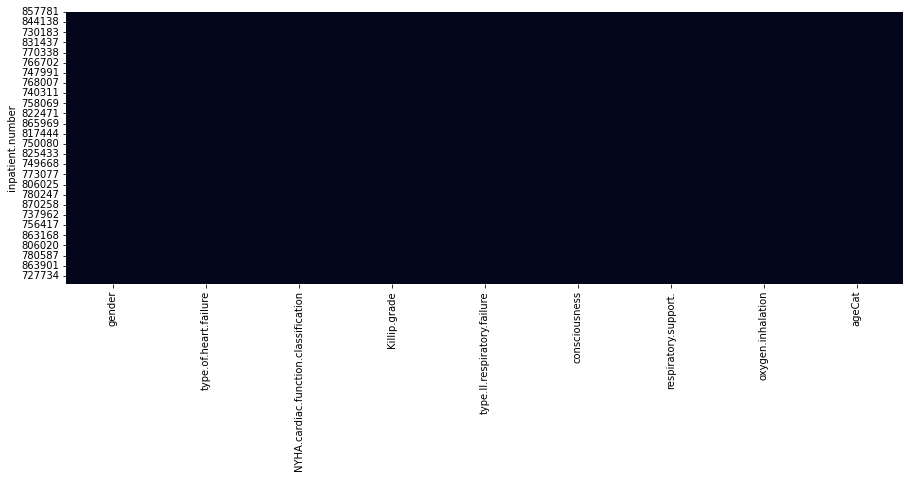

In [60]:
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(cat_col.isnull(), cbar = False)

# display the plot
plt.show()